# 데이터사이언스 (0010085001)

## Exercise 12: Linear Regression

In this excercise, we will implement the linear regression algorithm.

- Regression models are used to describe relationship between variables by fitting a line to the observed data. 
- Regression allows you to desimtate how a dependent variable changes as the independent variable(s) change.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA
from sklearn import datasets

In [7]:
# 1. 데이터 생성

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

data = datasets.load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
# regression 에 필요한 데이터만 선택
data = data.data
print(data.shape)

(150, 4)


### 1. Simple Linear Regression

Simple Linear Regression is used to estimate the relationship between two quantitative variables.

In [10]:
# 2. 데이터 분리

# f1  f2  f3  f4
# 



# 2.1 inputs (X) 설정
X = data[:, 0] # f1
print(X.shape)

# 차원 확장 (150, ) -> (150, 1)
X = np.expand_dims(X, axis=1)

# bias 추가 (linear classification 과 동일)
oneVector = np.ones((X.shape[0], 1)) # (150, 1)
print(oneVector.shape)

# bias 와 기존의 X 를 결합하기
X = np.concatenate((oneVector, X), axis=1)

# 주어진 입력을 matrix 형태로 변경
X = np.asmatrix(X)
print('inputs: ', X.shape) # X


# 2.2 targets (Y) 설정
Y = data[:, 3] # f4
print('targets: ', Y.shape) # y

(150,)
(150, 1)
inputs:  (150, 2)
targets:  (150,)


In [11]:
# 3. linear regression 수행

# X, Y 를 관계짓는 weights ([w0, w1]) 을 찾기 위해서는 pseudo-inverse 계산이 필요함
# pseudo-inverse 는 X^\dagger = ((X^t*X)^-1)*X^T 를 통해 이루어짐

# X^t 계산
XT = np.transpose(X)

# (X_t * X) 계산
XTX = np.matmul(XT, X)

# (X_t * X)^-1 계산
XTXINV = LA.inv( XTX )

# ((X_t*X)^-1)*X^T -> pseudo-inverse
XTXINVTR = np.dot( XTXINV, XT )

# targets (Y) 와의 inner product 를 통해서 closed-form solution 을 구할 수 있음
w_lin = np.dot(XTXINVTR, Y)
print(w_lin) # [w0, w1]^T
print(w_lin.shape)

[[-3.200215    0.75291757]]
(1, 2)


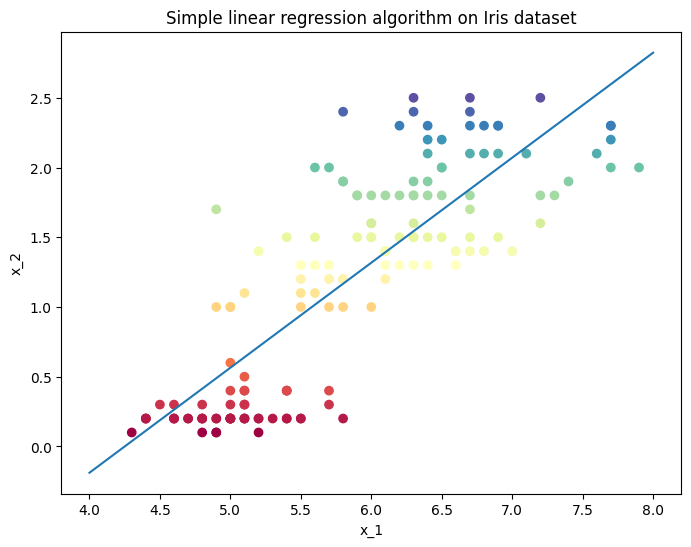

In [13]:
# 4. 시각화

intercept = w_lin[0, 0]
slope = w_lin[0, 1]

X_ = np.squeeze(np.asarray(X[:, 1]))

plt.figure(figsize=(8,6))
plt.scatter(X_, Y, c=Y, cmap=plt.cm.Spectral)

# line 생성
x_hyperplane = np.linspace(4, 8, 10)
y_hyperplane = slope * x_hyperplane + intercept

plt.plot(x_hyperplane, y_hyperplane, '-')
plt.title("Simple linear regression algorithm on Iris dataset")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

# f1 f2 f3 f4

# => f1 (X), f4 (Y)
# => y = w0 + w1*x

In [16]:
# 5. error 계산

# w_lin 과 입력의 inner-product 를 통해 우리의 예측 계산
Y_pred = np.matmul(X, np.transpose(w_lin))

# Y로부터 차원 확장으로 Y_true 계산 X[:, 3]
Y_true = np.expand_dims(Y, axis=1) # (150, ) -> (150, 1)

# Y_pred 와 Y_true 의 residual 계산
residual = Y_pred - Y_true

errors_l2 = LA.norm((Y_pred - Y_true), ord=2)
print('Sum of squared errors (MSE) is: ', errors_l2)

errors_l1 = LA.norm((Y_pred - Y_true), ord=1)
print('Sum of absolute errors (MAE) is: ', errors_l1)

Sum of squared errors is:  5.352779759539995
Sum of absolute errors is:  53.91187093195856


### 2. Multiple Linear Regression

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

In [17]:
# 2. 데이터 분리

# f1 f2 f3 f4 

# 2.1 inputs (X) 설정
X = data[:, 0:2] # (150, 2)
print(X.shape)

# bias 추가 (linear classification 과 동일)
oneVector = np.ones((X.shape[0], 1)) # (150, 1)

# bias 와 기존의 X 를 결합하기
X = np.concatenate((oneVector, X), axis=1) # (150, 3)

# 주어진 입력을 matrix 형태로 변경
X = np.asmatrix(X)
print('inputs: ', X.shape)

# 2.2 targets (Y) 설정
Y = data[:, 3]
print('targets: ', Y.shape)

(150, 2)
inputs:  (150, 3)
targets:  (150,)


In [18]:
# 3. linear regression 수행

# X, Y 를 관계짓는 weights ([w0, w1, w2]) 을 찾기 위해서는 pseudo-inverse 계산이 필요함
# pseudo-inverse 는 ((X_t*X)^-1)*X^T 를 통해 이루어짐

# X_t 계산
XT = np.transpose(X)

# (X_t * X) 계산
XTX = np.matmul(XT, X)

# (X_t * X)^-1 계산
XTXINV = np.linalg.inv( XTX )

# ((X_t*X)^-1)*X^T -> pseudo-inverse
XTXINVTR = np.dot( XTXINV, XT )

# targets (Y) 와의 inner product 를 통해서 closed-form solution 을 구할 수 있음
w_lin = np.dot(XTXINVTR, Y)
print(w_lin)
print(w_lin.shape)

[[-1.56349227  0.723292   -0.47872132]]
(1, 3)


In [20]:
# 4. error 계산

from numpy import linalg as LA

# w_lin 과 입력의 inner-product 를 통해 우리의 예측 계산
Y_pred = np.matmul(X, np.transpose(w_lin))

# Y로부터 차원 확장으로 Y_true 계산
Y_true = np.expand_dims(Y, axis=1) # (150, ) -> (150, 1)

# Y_pred 와 Y_true 의 residual 계산
residual = Y_pred - Y_true

errors_l2 = LA.norm((Y_pred - Y_true), ord=2)
print('Sum of squared errors (MSE) is: ', errors_l2)

errors_l1 = LA.norm((Y_pred - Y_true), ord=1)
print('Sum of absolute errors (MAE) is: ', errors_l1)

Sum of squared errors (MSE) is:  4.717489342436789
Sum of absolute errors (MAE) is:  45.87335998509215


### 3. K-fold cross validation

In [21]:
from sklearn.model_selection import train_test_split

# 1. |                        training                   |
# 2. |            training               |      test     |
# training data: 모델 학습을 위해서 사용
# test data: 모델 평가 (evaluation/validation)를 위해서 사용


data = datasets.load_iris()
X = data.data
Y = data.target

# 교차검증 횟수만큼 for loop 수행
for k in range (0, 10):
    # 학습 (training) / 평가 (test) 데이터 구분
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    X_train, X_test, _, _ = train_test_split(X, Y, test_size=0.2, random_state = k)
    
    # X_train => [f1, f2, f3, f4]
    # X_test => [f1, f2, f3, f4]

    # [0, 1, 2, 3, 4, ..., 149]
    # => data = shuffle([0, 1, 2, 3, 4, ..., 149]) = [2, 132, 49, 58..]
    # => X_train = data[:len(data)*0.8] / 0 ~ 0.8
    # => X_test = data[len(data)*0.8:] / 0.8 ~ 1

    # targets (Y) 설정
    Y_train = X_train[:, 3] # 120
    Y_test = X_test[:, 3] # 30

    # inputs (X) 설정
    X_train = X_train[:, 0] # (120,)
    X_test = X_test[:, 0]
    
    # 차원 확장
    X_train = np.expand_dims(X_train, axis=1) # (120,) -> (120, 1)
    X_test = np.expand_dims(X_test, axis=1)

    # bias 추가 (linear classification 과 동일)
    oneVector_train = np.ones((X_train.shape[0], 1))
    oneVector_test = np.ones((X_test.shape[0], 1))

    # bias 와 기존의 X_train 를 결합하기
    X_train = np.concatenate((oneVector_train, X_train), axis=1) # (120, 2)
    X_test = np.concatenate((oneVector_test, X_test), axis=1) # (30, 2)

    ######################
    ### training phase ###
    ######################

    # 주어진 입력을 matrix 형태로 변경
    X_train = np.asmatrix(X_train)
    
    # Training the model using Linear Regresion 
    XT = np.transpose( X_train )
    XTX = np.matmul( XT, X_train )
    XTXINV = np.linalg.inv( XTX )
    XTXINVTR = np.dot( XTXINV, XT )
    
    # k 번째 검증에 대한 w_lin 계산
    w_lin = np.dot( XTXINVTR, Y_train )

    w_lin_ = np.transpose(w_lin)
  
  
    ######################
    ##### test phase #####
    ######################

    # w_lin 과 X_test의 inner-product 를 통해 우리의 예측 계산
    Y_pred = np.matmul(X_test, w_lin_)

    # Y로부터 차원 확장으로 Y_true 계산
    Y_true = np.expand_dims(Y_test, axis=1) 

    # Y_pred 와 Y_true 의 residual 계산
    # residual = Y_pred - Y_test

    print('Erros for {}-th fold'.format(k))
    errors_l2 = LA.norm((Y_pred - Y_true), ord=2)
    print('Sum of squared errors (MSE) is: ', errors_l2)

    errors_l1 = LA.norm((Y_pred - Y_true), ord=1)
    print('Sum of absolute errors (MAE) is: ', errors_l1)

Erros for 0-th fold
Sum of squared errors (MSE) is:  2.485924491934867
Sum of absolute errors (MAE) is:  10.461048459949835
Erros for 1-th fold
Sum of squared errors (MSE) is:  2.2459096506239726
Sum of absolute errors (MAE) is:  10.257265794458906
Erros for 2-th fold
Sum of squared errors (MSE) is:  2.0938575299222766
Sum of absolute errors (MAE) is:  9.546058802795644
Erros for 3-th fold
Sum of squared errors (MSE) is:  2.0156120467628775
Sum of absolute errors (MAE) is:  9.098937303196632
Erros for 4-th fold
Sum of squared errors (MSE) is:  2.47858953710348
Sum of absolute errors (MAE) is:  11.398323036830801
Erros for 5-th fold
Sum of squared errors (MSE) is:  2.403282875702265
Sum of absolute errors (MAE) is:  10.139145167866804
Erros for 6-th fold
Sum of squared errors (MSE) is:  1.7239298107460241
Sum of absolute errors (MAE) is:  7.957901713338476
Erros for 7-th fold
Sum of squared errors (MSE) is:  2.4923846030883126
Sum of absolute errors (MAE) is:  11.221195314924037
Erros f